In [1]:
!pip install yfinance

In [2]:

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:

# Load 1 year of ONGC stock data
ticker = yf.Ticker("ONGC.NS")
df = ticker.history(period="1y")
df = df.reset_index()[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
df.head()


,Date,Close,Days
0,2024-06-20 00:00:00+05:30,258.157806,0
1,2024-06-21 00:00:00+05:30,256.068634,1
2,2024-06-24 00:00:00+05:30,256.306000,4
3,2024-06-25 00:00:00+05:30,253.552094,5
4,2024-06-26 00:00:00+05:30,254.264328,6


In [10]:
# Train a linear regression model
X = df['Days'].values.reshape(-1, 1)
y = df['Close']

model = LinearRegression()
model.fit(X, y)

# Predict for next 30 days
future_days = np.array(range(df['Days'].max() + 1, df['Days'].max() + 31)).reshape(-1, 1)
future_preds = model.predict(future_days)

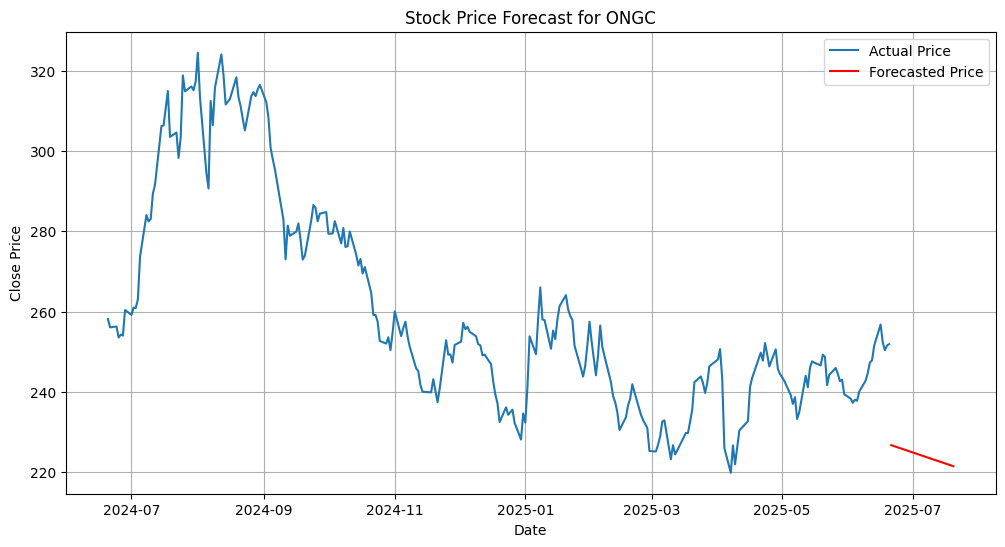

In [11]:

# Visualize actual vs forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(pd.date_range(df['Date'].max() + pd.Timedelta(days=1), periods=30),
         future_preds, label='Forecasted Price', color='red')
plt.title("Stock Price Forecast for ONGC")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()
